<a href="https://colab.research.google.com/github/naenumtou/statisticalModel/blob/main/pcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%config InlineBackend.figure_format = 'retina'

In [ ]:
#Import data
df = pd.read_csv('https://raw.githubusercontent.com/naenumtou/statisticalModel/main/datasets/pcr.csv')

#Target and Features split
x = df.drop(['y'], axis = 1)
y = df['y']

In [ ]:
#First linear regression
model = LinearRegression()
model.fit(x, y)

#Model ouput
print(f'R-Square: {model.score(x, y) * 100:.2f}%')
print(f'Intercept: {model.intercept_:.4f}')
print(f'Coefficient: {model.coef_}')

R-Square: 92.27%
Intercept: -45.2025
Coefficient: [ 1.40460670e+00  9.21245107e+00  7.47890659e+01 -1.25950253e+02
  8.31045469e-06  1.51582766e+02]


In [ ]:
#Multicollinearity check
vif_test = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
labels = x.columns
print(dict(zip(labels, vif_test)))

{'x1': 5.412420666512664, 'x2': 65.189167100316, 'x3': 42.70783346887951, 'x4': 448.2873978668344, 'x5': 87.03781270671921, 'x6': 941.5778878807635}


In [ ]:
#Standardize features
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale = pd.DataFrame(x_scale, columns = x.columns)

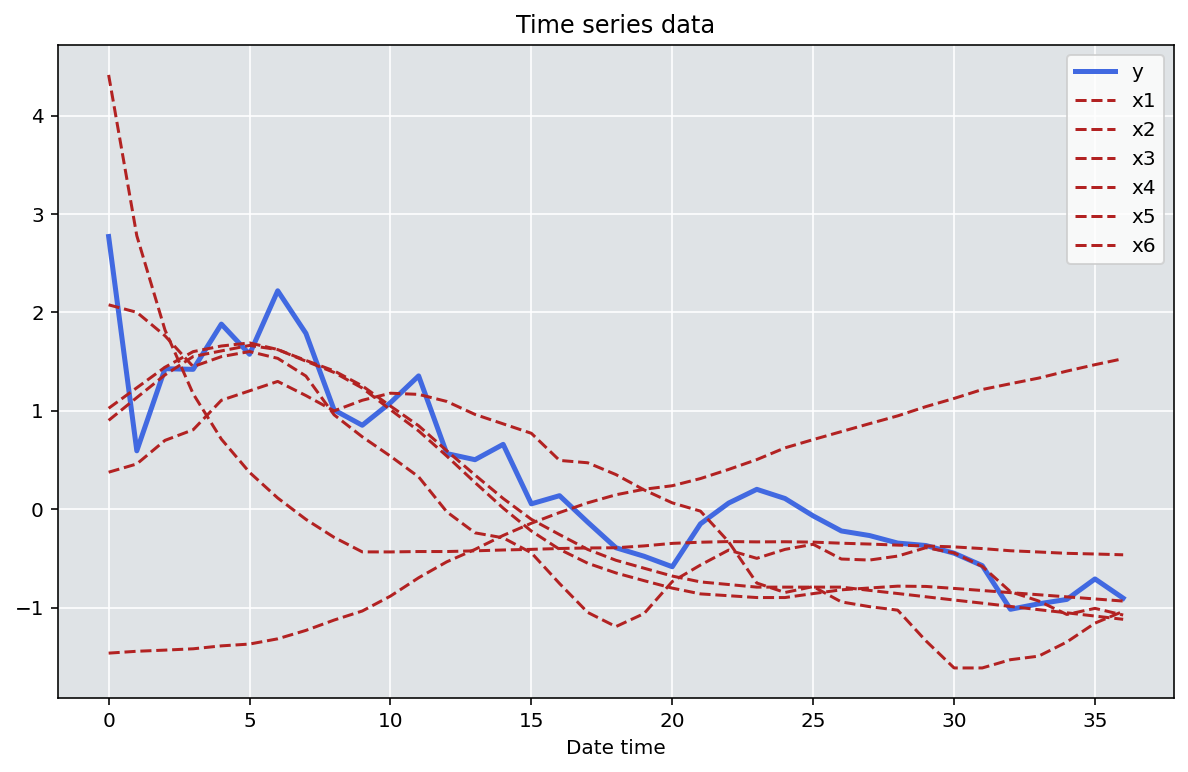

In [ ]:
#Plot target and features
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(y, c = 'royalblue', linewidth = 2.5, label = 'y')

for col in x_scale.columns:
  plt.plot(x_scale[col], c = 'firebrick', linestyle = '--', label = col)

plt.xlabel('Date time')
plt.legend()
plt.title('Time series data')
plt.show()

In [ ]:
#PCA
pca = PCA(n_components = 1) #Decompose to 1 component
pca.fit(x_scale) #Fitting PCA
prin1 = pca.transform(x_scale) #Transform to PCA

#Print results
print(f'Eigenvalues = {pca.explained_variance_}') #Explained variance
print(f'Explaining ratio = {pca.explained_variance_ratio_}')
print(f'Eigenvectors = {pca.components_[0]}') #Eigenvectors

Eigenvalues = [4.98808104]
Explaining ratio = [0.80887801]
Eigenvectors = [ 0.28176561  0.42553242  0.38306641  0.44241212 -0.44602388  0.44511194]


R-Square: 86.33%
Intercept: 0.3168
Coefficient: 0.4051


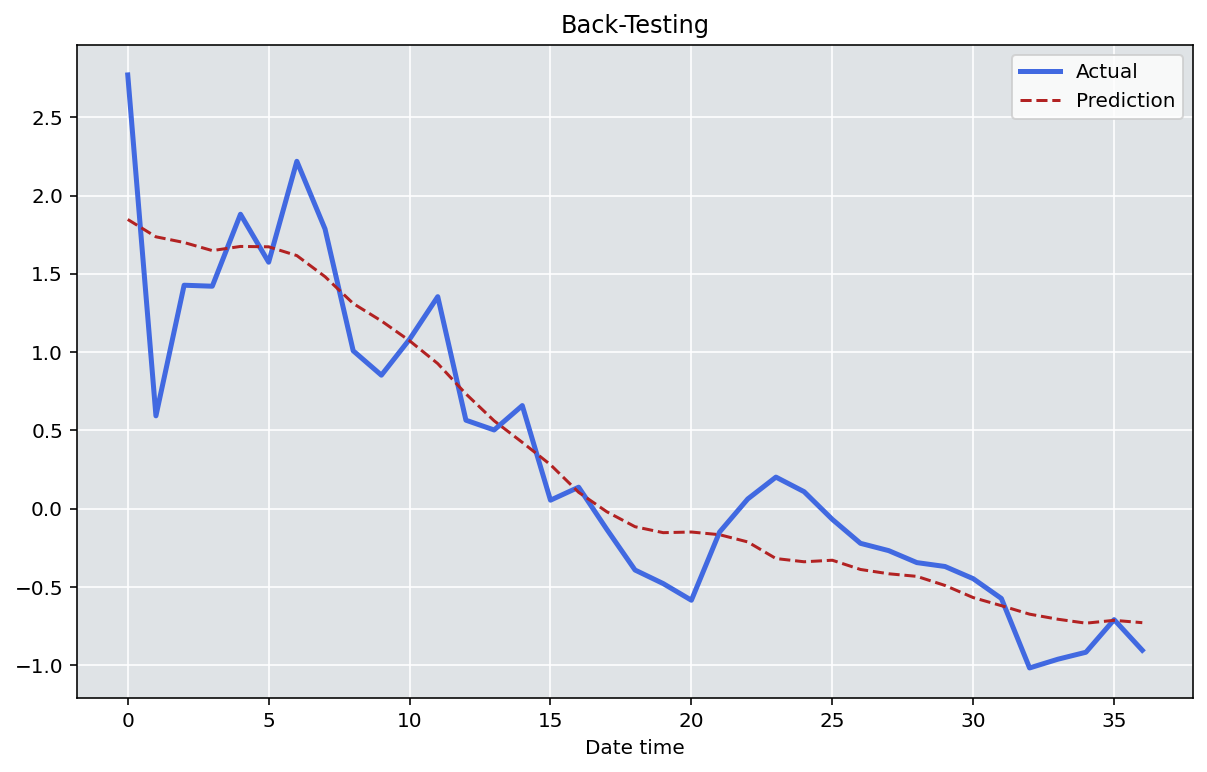

In [ ]:
#Second linear regression
model.fit(prin1, y)

#Model ouput
print(f'R-Square: {model.score(prin1, y) * 100:.2f}%')
print(f'Intercept: {model.intercept_:.4f}')
print(f'Coefficient: {model.coef_[0]:.4f}')

#Plot prediction
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(y, c = 'royalblue', linewidth = 2.5, label = 'Actual') #Actual
plt.plot(model.predict(prin1), c = 'firebrick', linestyle = '--', label = 'Prediction') #Prediction
plt.xlabel('Date time')
plt.legend()
plt.title('Back-Testing')
plt.show()

In [ ]:
#Function prediction of PCR
def prediction(x):
  model_coeff = model.coef_[0] * pca.components_[0]
  y_hat = np.dot(x.values, model_coeff) + model.intercept_ #Linear equation
  return y_hat

pred = prediction(x_scale)

array([ 1.84759328,  1.73673825,  1.70029438,  1.64865714,  1.67522206,
        1.67284519,  1.61674766,  1.48213982,  1.31060511,  1.19942578,
        1.07273185,  0.92676178,  0.73318009,  0.56144955,  0.42359875,
        0.2808739 ,  0.10442333, -0.01978623, -0.11523279, -0.15324214,
       -0.1491063 , -0.16619893, -0.21243923, -0.31855733, -0.33915588,
       -0.3293318 , -0.38835924, -0.41581492, -0.4323875 , -0.49046085,
       -0.56801617, -0.61962277, -0.67381936, -0.70610299, -0.73140736,
       -0.71329574, -0.72823512])

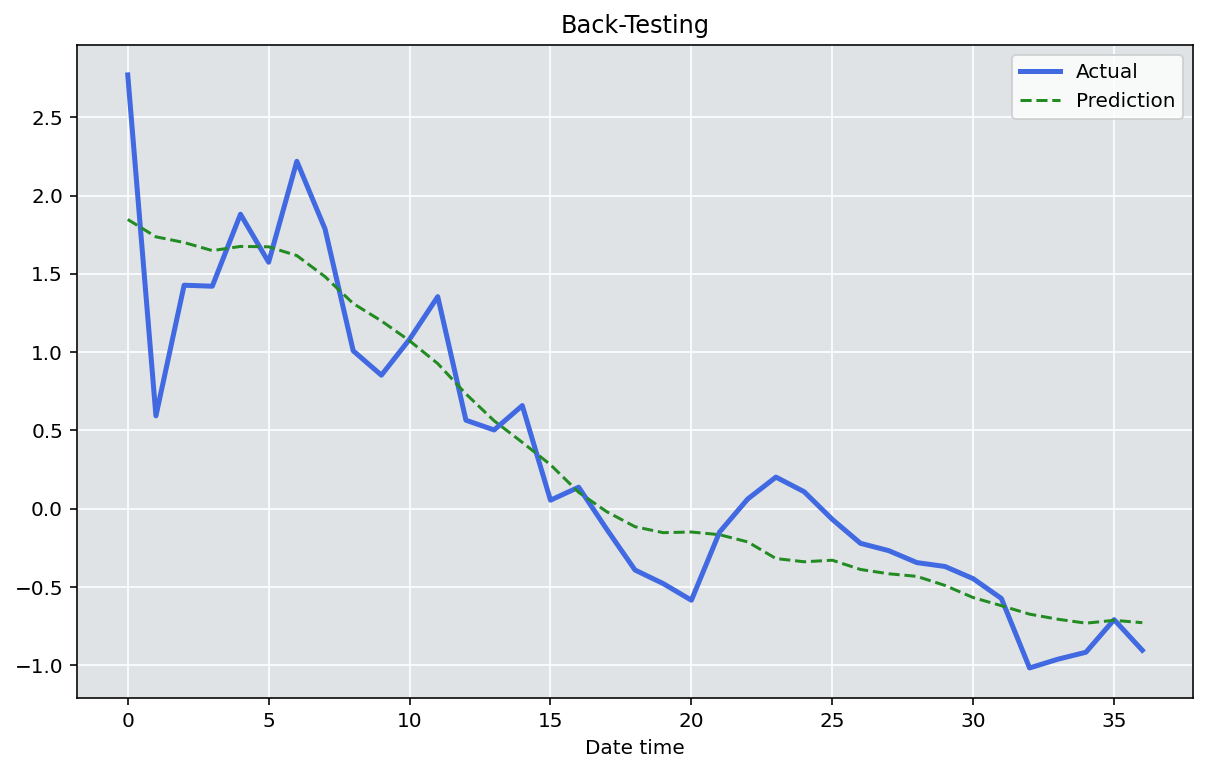

In [ ]:
#Plot prediction
plt.figure(figsize = (10,6))
ax = plt.axes()
ax.set_facecolor('#dfe3e6')
plt.grid(color = 'w')
plt.plot(y, c = 'royalblue', linewidth = 2.5, label = 'Actual') #Actual
plt.plot(pred, c = 'forestgreen', linestyle = '--', label = 'Prediction') #Prediction
plt.xlabel('Date time')
plt.legend()
plt.title('Back-Testing')
plt.show()